# import all

In [1]:
import os
import glob
from natsort import natsorted
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import AnnotationBbox
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from scipy.stats import pearsonr,spearmanr
import random
from statannotations.Annotator import Annotator
import cv2 as cv
import matplotlib
import glob
import hdf5storage
from matplotlib.colors import Normalize
from scipy.stats import f_oneway, mannwhitneyu, ttest_ind, shapiro, levene, kstest, kruskal
from statsmodels.stats.multitest import multipletests
import shutil
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.stats import norm
from scipy.optimize import curve_fit
import json
import matplotlib.gridspec as gridspec

In [2]:
def loadmat_data(filename):
    file = loadmat(filename)
    name = list(file.keys())
    data = file[name[3]]
    return data

In [3]:
def normlized_tuning(neuron_response,mode:str):
    if mode == 'zscore':
        scaler = StandardScaler().fit(neuron_response)
        neuron_reponse_normlized = scaler.transform(neuron_response)
    elif mode == 'maxmin':
        scaler = MinMaxScaler()
        neuron_reponse_normlized = scaler.fit_transform(neuron_response)
    elif mode == 'all':    
        scaler = StandardScaler().fit(neuron_response)
        neuron_reponse_zscore = scaler.transform(neuron_response)
        scaler = MinMaxScaler()
        neuron_reponse_normlized = scaler.fit_transform(neuron_reponse_zscore)
    else:
        return None
    return neuron_reponse_normlized

In [4]:
def get_specified_1D_item(all_results, item):
    
    all_value = []
    for i in range(len(all_results)):
        temp = all_results[i][item]
        all_value.append(temp)
    return all_value

In [5]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.01:
        return "*"
    return "ns"

In [6]:
def convert_pvalue_to_str(pvalue):

    return f'p = {pvalue:.3f}'

In [7]:
def load_ori_cell_index_path(Monkey_path, cell_pattern:str):
    if cell_pattern=='target':
        Monkey_target_path = os.path.join(os.path.dirname(Monkey_path), 'Analysis_learn_form_yu')
        data_path = os.path.join(Monkey_target_path, 'targetCell.mat')
    elif cell_pattern=='ori':
        data_path = os.path.join(Monkey_path, 'ori_cell_index.mat')
    return data_path

In [8]:
def difference_compare_two_group(group1, group2):
    
    _, p_normal_group1 = shapiro(group1)
    _, p_normal_group2 = shapiro(group2)
    _, p_normal_group1 = kstest(group1, 'norm')
    _, p_normal_group2 = kstest(group2, 'norm')
    print(p_normal_group1, p_normal_group2)
    
    _, p_levene = levene(group1, group2)

    
    alpha = 0.05

    
    if p_normal_group1 > alpha and p_normal_group2 > alpha and p_levene> aplpha:
        
        t_statistic, p_value = ttest_ind(group1, group2)
        test_used = 't-test'
        n = len(group1) + len(group2)
        z_statistic = t_statistic / (n ** 0.5)
    else:
        u_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = 'Mann-Whitney U'
        
       
        n1 = len(group1)
        n2 = len(group2)
        mu_u = n1 * n2 / 2
        sigma_u = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
        z_statistic = (u_statistic - mu_u) / sigma_u


    print(f'Test used: {test_used}, statistic: {z_statistic}, \n p-value: {p_value:.3e} \n p-value: {p_value:.4f} ')
    return p_value

In [9]:
def t_to_z(group1, group2, t_statistic):
    n = len(group1) + len(group2)
    z_statistic = t_statistic / (n ** 0.5)
    return z_statistic

In [10]:
def u_to_z(group1, group2, u_statistic):
   
    n1 = len(group1)
    n2 = len(group2)
    mu_u = n1 * n2 / 2
    sigma_u = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
    z_statistic = (u_statistic - mu_u) / sigma_u
    return z_statistic

In [11]:
def difference_compare_two_group(group1, group2):
    
    _, p_normal_group1 = shapiro(group1)
    _, p_normal_group2 = shapiro(group2)
    _, p_normal_group1 = kstest(group1, 'norm')
    _, p_normal_group2 = kstest(group2, 'norm')
    print(p_normal_group1, p_normal_group2)
    
    _, p_levene = levene(group1, group2)

    
    alpha = 0.05

    
    if p_normal_group1 > alpha and p_normal_group2 > alpha and p_levene> alpha:
        
        t_statistic, p_value = ttest_ind(group1, group2)
        test_used = 't-test'
        z_statistic = t_to_z(group1, group2, t_statistic)
    else:
        u_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = 'Mann-Whitney U'
        z_statistic = u_to_z(group1, group2, u_statistic)


    print(f'Test used: {test_used}, statistic: {z_statistic}, \n p-value: {p_value:.3e} \n p-value: {p_value:.4f} ')
    return p_value

In [12]:
def find_nth_number(arr, n, number:int):
    count = -1
    for index, value in enumerate(arr):
        if value == number:
            count += 1
            if count == n:
                return index
    

In [13]:
MonkeyA_path = '/MA/Analysis'
MonkeyB_path = '/MB_CC/Analysis'
MonkeyC_path = '/MC_CC/Analysis'
MonkeyD_path = '/MD/Analysis'
Monkey_name = ['Monkey A', 'Monkey B', 'Monkey C', 'Monkey D']
Monkey_path_list = [MonkeyA_path, MonkeyB_path, MonkeyC_path, MonkeyD_path]

In [14]:
panel_label_size = 12
label_size = 8
tick_size = 6
legend_size = 6

the_specific_group = 11
monkey_palette = ["#C7C7C7", "#F49680", "#6596E5", "#7A7CBB"]

ori_color = '#E22B1C'
non_ori_color = '#3161B2'

signi_ori_color = '#7A7CBB'
neuron_color=[ori_color, non_ori_color]
neuron_color_3compare = [ori_color, non_ori_color, signi_ori_color]
spatial_size = ['s', 'm', 'l']
spatial_frequency = np.array([0.25,0.5,1,2,4,8])

original_rcParams = dict(mpl.rcParams)

# Results 1

In [15]:
i = 0
ori = np.arange(-45,121,15)
neg_ori_index = np.where(ori<=0)[0]
ori[neg_ori_index] = ori[neg_ori_index] + 180
ori_array = [15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]

## Fig 1

### Fig 1-A

In [30]:
data_path = os.path.join(MonkeyA_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/all_groups_1000_rounds_median_non_ori_results.mat')
all_groups_1000_rounds_median_non_ori_results = np.squeeze(loadmat_data(data_path))
the_specific_group_non_ori_results = all_groups_1000_rounds_median_non_ori_results[the_specific_group]
r_mean_non_ori = np.squeeze(the_specific_group_non_ori_results[1])
p_mean_non_ori = np.squeeze(the_specific_group_non_ori_results[2])
MAE_non_ori = np.squeeze(the_specific_group_non_ori_results[5])
MAE_mean_non_ori = np.mean(MAE_non_ori)
predicted_all_non_ori = np.squeeze(the_specific_group_non_ori_results[6])
Y_test_all_non_ori = np.squeeze(the_specific_group_non_ori_results[7])
weights_non_ori_best = np.squeeze(the_specific_group_non_ori_results[8])

ori_cell= np.squeeze(loadmat_data(os.path.join(MonkeyA_path, 'ori_cell.mat')))

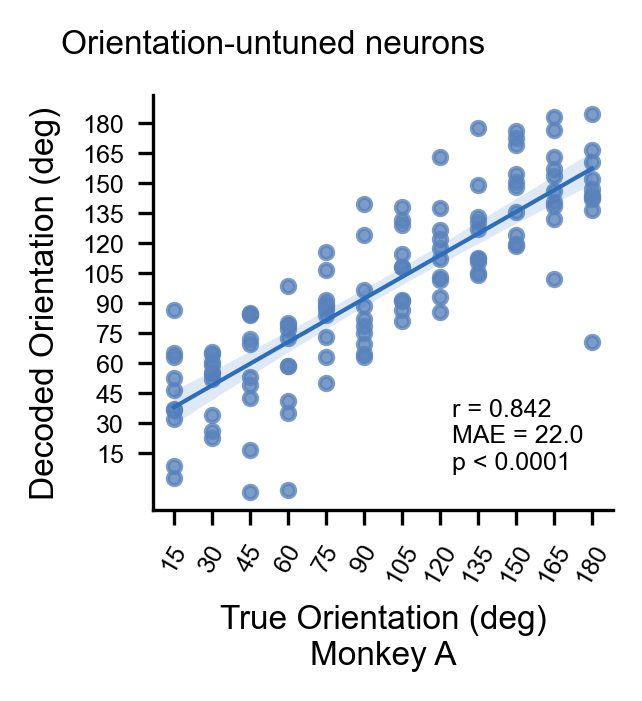

In [31]:
fig = plt.figure(figsize=(2.1,2.2),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

sns.regplot(x=Y_test_all_non_ori, y=predicted_all_non_ori, 
            scatter_kws={"s":10, "marker":"o", 'color':'#5A83BC'}, line_kws={'linewidth': 1, 'color':'#2C6DBC'})
# sns.regplot(x=Y_test_all_non_ori, y=predicted_all_non_ori, 
#             scatter_kws={"s":10, "marker":"o", 'color':'#ABABAB'}, line_kws={'linewidth': 1, 'color':'black'})
ax = plt.gca()


ax.text(-0.2, 1.1, 'Orientation-untuned neurons', transform=ax.transAxes, size=label_size)
ax.set_xlabel('True Orientation (deg)\nMonkey A', fontsize=label_size)
ax.set_ylabel('Decoded Orientation (deg)', fontsize=label_size, labelpad=5)


ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

x = [i for i in range(15, 181, 15)]
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=60) 
ax.set_yticks(x)
ax.set_yticklabels(x,rotation=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.text(0.65, 0.1, f'r = 0.842\nMAE = 22.0\np < 0.0001', transform=ax.transAxes, fontsize=legend_size) 
plt.subplots_adjust(left=.24, bottom=0.25, right=0.97, top=0.88) 
plt.savefig('./Results/results1/Fig1_A.pdf', format='pdf', dpi=300)

### Fig 1-B

In [32]:
data_path = os.path.join(MonkeyA_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/all_groups_1000_rounds_median_non_ori_results.mat')
all_groups_1000_rounds_median_results = np.squeeze(loadmat_data(data_path))
the_specific_group_results = all_groups_1000_rounds_median_results[the_specific_group]
r_mean = np.squeeze(the_specific_group_results[1])
p_mean = np.squeeze(the_specific_group_results[2])
MAE_array = np.squeeze(the_specific_group_results[5])
MAE_mean = np.mean(MAE_array)
print(f'MonkeyA, r={r_mean:.4f}, MAE={MAE_mean:.2f}')

data_path = os.path.join(MonkeyB_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/all_groups_1000_rounds_median_non_ori_results.mat')
all_groups_1000_rounds_median_results = np.squeeze(loadmat_data(data_path))
the_specific_group_results = all_groups_1000_rounds_median_results[the_specific_group]
r_mean = np.squeeze(the_specific_group_results[1])
p_mean = np.squeeze(the_specific_group_results[2])
MAE_array = np.squeeze(the_specific_group_results[5])
MAE_mean = np.mean(MAE_array)
print(f'MonkeyB,r={r_mean:.4f}, MAE={MAE_mean:.2f}')

data_path = os.path.join(MonkeyC_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/all_groups_1000_rounds_median_non_ori_results.mat')
all_groups_1000_rounds_median_results = np.squeeze(loadmat_data(data_path))
the_specific_group_results = all_groups_1000_rounds_median_results[the_specific_group]
r_mean = np.squeeze(the_specific_group_results[1])
p_mean = np.squeeze(the_specific_group_results[2])
MAE_array = np.squeeze(the_specific_group_results[5])
MAE_mean = np.mean(MAE_array)
print(f'MonkeyC,r={r_mean:.4f}, MAE={MAE_mean:.2f}')

data_path = os.path.join(MonkeyD_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/all_groups_1000_rounds_median_non_ori_results.mat')
all_groups_1000_rounds_median_results = np.squeeze(loadmat_data(data_path))
the_specific_group_results = all_groups_1000_rounds_median_results[the_specific_group]
r_mean = np.squeeze(the_specific_group_results[1])
p_mean = np.squeeze(the_specific_group_results[2])
MAE_array = np.squeeze(the_specific_group_results[5])
MAE_mean = np.mean(MAE_array)
print(f'MonkeyD,r={r_mean:.4f}, MAE={MAE_mean:.2f}')

MonkeyA, r=0.8427, MAE=22.46
MonkeyB,r=0.9233, MAE=16.41
MonkeyC,r=0.9130, MAE=17.28
MonkeyD,r=0.8244, MAE=23.62


In [33]:
r_array = np.array([0.8418, 0.9236, 0.9127, 0.8245])
mae_array = np.array([21.97, 16.27, 16.98, 23.67])
print(f'r={np.mean(r_array):.4f}±{np.std(r_array):.4f}')
print(f'mae={np.mean(mae_array):.2f}±{np.std(mae_array):.2f}')


r=0.8757±0.0431
mae=19.72±3.17


In [34]:
r_array = np.array([0.9105, 0.9509, 0.9496, 0.9050])
mae_array = np.array([15.78, 13.18, 13.01, 17.90])
print(f'r={np.mean(r_array):.4f}±{np.std(r_array):.4f}')
print(f'mae={np.mean(mae_array):.2f}±{np.std(mae_array):.2f}')

r=0.9290±0.0213
mae=14.97±2.02


In [35]:
# r
data_path = os.path.join(MonkeyA_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/r_mean_rounds_all_groups_non_ori.mat')
r_mean_rounds_all_groups_non_ori_MonkeyA = loadmat_data(data_path)
r_mean_rounds_specific_group_non_ori_MonkeyA = r_mean_rounds_all_groups_non_ori_MonkeyA[:, the_specific_group]

data_path = os.path.join(MonkeyB_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/r_mean_rounds_all_groups_non_ori.mat')
r_mean_rounds_all_groups_non_ori_MonkeyB = loadmat_data(data_path)
r_mean_rounds_specific_group_non_ori_MonkeyB = r_mean_rounds_all_groups_non_ori_MonkeyB[:, the_specific_group]

data_path = os.path.join(MonkeyC_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/r_mean_rounds_all_groups_non_ori.mat')
r_mean_rounds_all_groups_non_ori_MonkeyC = loadmat_data(data_path)
r_mean_rounds_specific_group_non_ori_MonkeyC = r_mean_rounds_all_groups_non_ori_MonkeyC[:, the_specific_group]
data_path = os.path.join(MonkeyD_path, 'results3_pre_all_unchange_cell/non_ori_cell_rounds_val/r_mean_rounds_all_groups_non_ori.mat')
r_mean_rounds_all_groups_non_ori_MonkeyD = loadmat_data(data_path)
r_mean_rounds_specific_group_non_ori_MonkeyD = r_mean_rounds_all_groups_non_ori_MonkeyD[:, the_specific_group]

r_mean_rounds_specific_group_non_ori_all_monkey = np.hstack([r_mean_rounds_specific_group_non_ori_MonkeyA,
                                                     r_mean_rounds_specific_group_non_ori_MonkeyB,
                                                     r_mean_rounds_specific_group_non_ori_MonkeyC,
                                                     r_mean_rounds_specific_group_non_ori_MonkeyD])


MonkeyA_string = ['MonkeyA'] * len(r_mean_rounds_specific_group_non_ori_MonkeyA)
MonkeyB_string = ['MonkeyB'] * len(r_mean_rounds_specific_group_non_ori_MonkeyB)
MonkeyC_string = ['MonkeyC'] * len(r_mean_rounds_specific_group_non_ori_MonkeyC)
MonkeyD_string = ['MonkeyD'] * len(r_mean_rounds_specific_group_non_ori_MonkeyD)
monkey = np.squeeze(np.array(MonkeyA_string + MonkeyB_string + MonkeyC_string + MonkeyD_string))
r_mean_rounds_non_ori_df = pd.DataFrame(columns=['Monkey', 'r'])   # Empty DataFrame
r_mean_rounds_non_ori_df['Monkey'] = monkey
r_mean_rounds_non_ori_df['r'] = r_mean_rounds_specific_group_non_ori_all_monkey

/tmp/ipykernel_27264/706020419.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(x='Monkey', y='r', data=r_mean_rounds_non_ori_df,


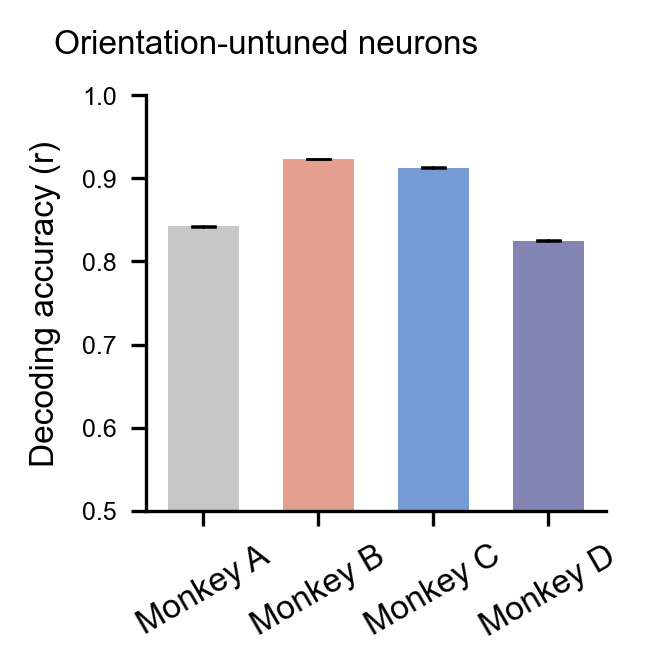

In [36]:
fig = plt.figure(figsize=(2.1,2.2),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

ax = sns.barplot(x='Monkey', y='r', data=r_mean_rounds_non_ori_df, 
                 estimator=np.mean, palette=monkey_palette,
                 ci=95, capsize=.2, errwidth=0.6, errcolor='black', linewidth=0.8)

bar_width = 0.618  
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width() 
    center = x + width / 2.0
    bar.set_x(center - bar_width / 2.0) 
    bar.set_width(bar_width) 
    
ax.set_ylim(0.5,1)


ax.text(-0.2, 1.1, 'Orientation-untuned neurons', transform=ax.transAxes, size=label_size)
ax.set_xlabel('')
ax.set_ylabel('Decoding accuracy (r)', fontsize=label_size, labelpad=5)


ax.tick_params(axis='x', labelsize=label_size)
ax.tick_params(axis='y', labelsize=tick_size)

x_label = [i for i in range(0, 4, 1)]
x_label_name = Monkey_name
ax.set_xticks(x_label)
ax.set_xticklabels(x_label_name, rotation=30) 


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(left=.24, bottom=0.25, right=0.97, top=0.88) 
plt.savefig('./Results/results1/Fig1_B.pdf', format='pdf', dpi=300)

### Fig 1-C

MonkeyA p = 0.8914120931863353
MonkeyB p = 0.7267152824311968
MonkeyC p = 0.18963960050893924
MonkeyD p = 0.8431686036080372


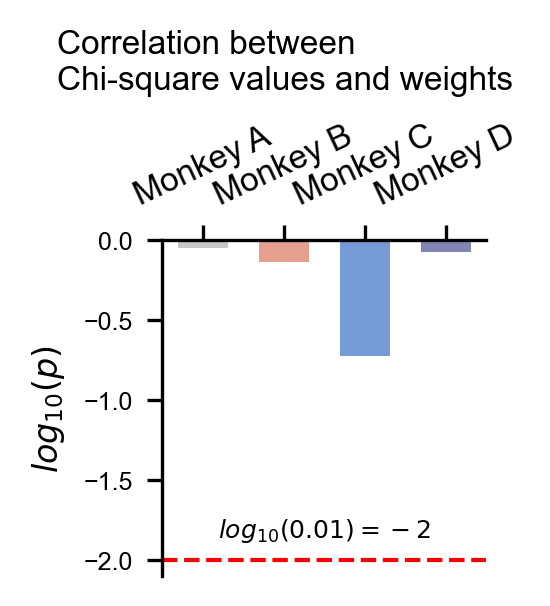

In [16]:
data_path = os.path.join(MonkeyA_path, 'results4_explain/ChiSq_weights_relationship/p_weights_chisq_non_ori_fdr.mat')
p_weights_chisq_non_ori_fdr_MonkeyA = np.squeeze(loadmat_data(data_path))
log_p_weights_chisq_non_ori_fdr_MonkeyA = np.log10(p_weights_chisq_non_ori_fdr_MonkeyA)
log_p_weights_chisq_non_ori_fdr_MonkeyA_specific_group = log_p_weights_chisq_non_ori_fdr_MonkeyA[the_specific_group]

data_path = os.path.join(MonkeyB_path, 'results4_explain/ChiSq_weights_relationship/p_weights_chisq_non_ori_fdr.mat')
p_weights_chisq_non_ori_fdr_MonkeyB = np.squeeze(loadmat_data(data_path))
log_p_weights_chisq_non_ori_fdr_MonkeyB = np.log10(p_weights_chisq_non_ori_fdr_MonkeyB)
log_p_weights_chisq_non_ori_fdr_MonkeyB_specific_group = log_p_weights_chisq_non_ori_fdr_MonkeyB[the_specific_group]

data_path = os.path.join(MonkeyC_path, 'results4_explain/ChiSq_weights_relationship/p_weights_chisq_non_ori_fdr.mat')
p_weights_chisq_non_ori_fdr_MonkeyC = np.squeeze(loadmat_data(data_path))
log_p_weights_chisq_non_ori_fdr_MonkeyC = np.log10(p_weights_chisq_non_ori_fdr_MonkeyC)
log_p_weights_chisq_non_ori_fdr_MonkeyC_specific_group = log_p_weights_chisq_non_ori_fdr_MonkeyC[the_specific_group]

data_path = os.path.join(MonkeyD_path, 'results4_explain/ChiSq_weights_relationship/p_weights_chisq_non_ori_fdr.mat')
p_weights_chisq_non_ori_fdr_MonkeyD = np.squeeze(loadmat_data(data_path))
log_p_weights_chisq_non_ori_fdr_MonkeyD = np.log10(p_weights_chisq_non_ori_fdr_MonkeyD)
log_p_weights_chisq_non_ori_fdr_MonkeyD_specific_group = log_p_weights_chisq_non_ori_fdr_MonkeyD[the_specific_group]

print(f'MonkeyA p = {p_weights_chisq_non_ori_fdr_MonkeyA[the_specific_group]}')
print(f'MonkeyB p = {p_weights_chisq_non_ori_fdr_MonkeyB[the_specific_group]}')
print(f'MonkeyC p = {p_weights_chisq_non_ori_fdr_MonkeyC[the_specific_group]}')
print(f'MonkeyD p = {p_weights_chisq_non_ori_fdr_MonkeyD[the_specific_group]}')

x_monkey = np.array(['Monkey A', 'Monkey B', 'Monkey C', 'Monkey D'])
y_r = np.array([log_p_weights_chisq_non_ori_fdr_MonkeyA_specific_group, 
                log_p_weights_chisq_non_ori_fdr_MonkeyB_specific_group,
                log_p_weights_chisq_non_ori_fdr_MonkeyC_specific_group,
                log_p_weights_chisq_non_ori_fdr_MonkeyD_specific_group])
fig = plt.figure(figsize=(1.8,2),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'
ax = sns.barplot(x=x_monkey, y=y_r, palette=monkey_palette)

bar_width = 0.618  
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width() 
    center = x + width / 2.0
    bar.set_x(center - bar_width / 2.0) 
    bar.set_width(bar_width) 

ax.set_ylim(-2.1,0)

ax.set_xlabel('')
ax.set_ylabel(r'$log_{10}(p)$', fontsize=label_size)


ax.xaxis.tick_top()  
ax.tick_params(axis='x', labelsize=label_size)
ax.tick_params(axis='y', labelsize=tick_size)

x_label = [i for i in range(0, 4, 1)]
x_label_name = ['Monkey A', 'Monkey B', 'Monkey C', 'Monkey D']
ax.set_xticks(x_label)
ax.set_xticklabels(x_label_name, rotation=25) 

ax.axhline(np.log10(0.01), color='red', linestyle='dashed', linewidth=1)
ax.text(1.5, np.log10(0.01)+0.1, r'$log_{10}(0.01) = -2$', fontsize=legend_size, ha='center', va='bottom') 
ax.text(-1.8, 0.9, 'Correlation between\nChi-square values and weights', fontsize=label_size, ha='left', va='bottom') 


ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=.3, bottom=0.06, right=0.9, top=0.62) 
plt.savefig('./Results/results1/Fig1_C.pdf', format='pdf', dpi=300)

# Results 2

In [66]:
ax_linewidth = 0.5
cb_linewidth = 0.5

from matplotlib.colors import LinearSegmentedColormap
def create_custom_cmap():
    colors = ['#5A83BC', '#FFFFFF']  
    cmap_name = 'custom_blue_white'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

custom_cmap = create_custom_cmap()

In [68]:
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/different_neurons/')
MDS_non_ori_list = natsorted(glob.glob(data_path + 'MDS_signifi_non_ori_neurons_*.mat'))
neurons_number_list = [10, 20, 50, 100]

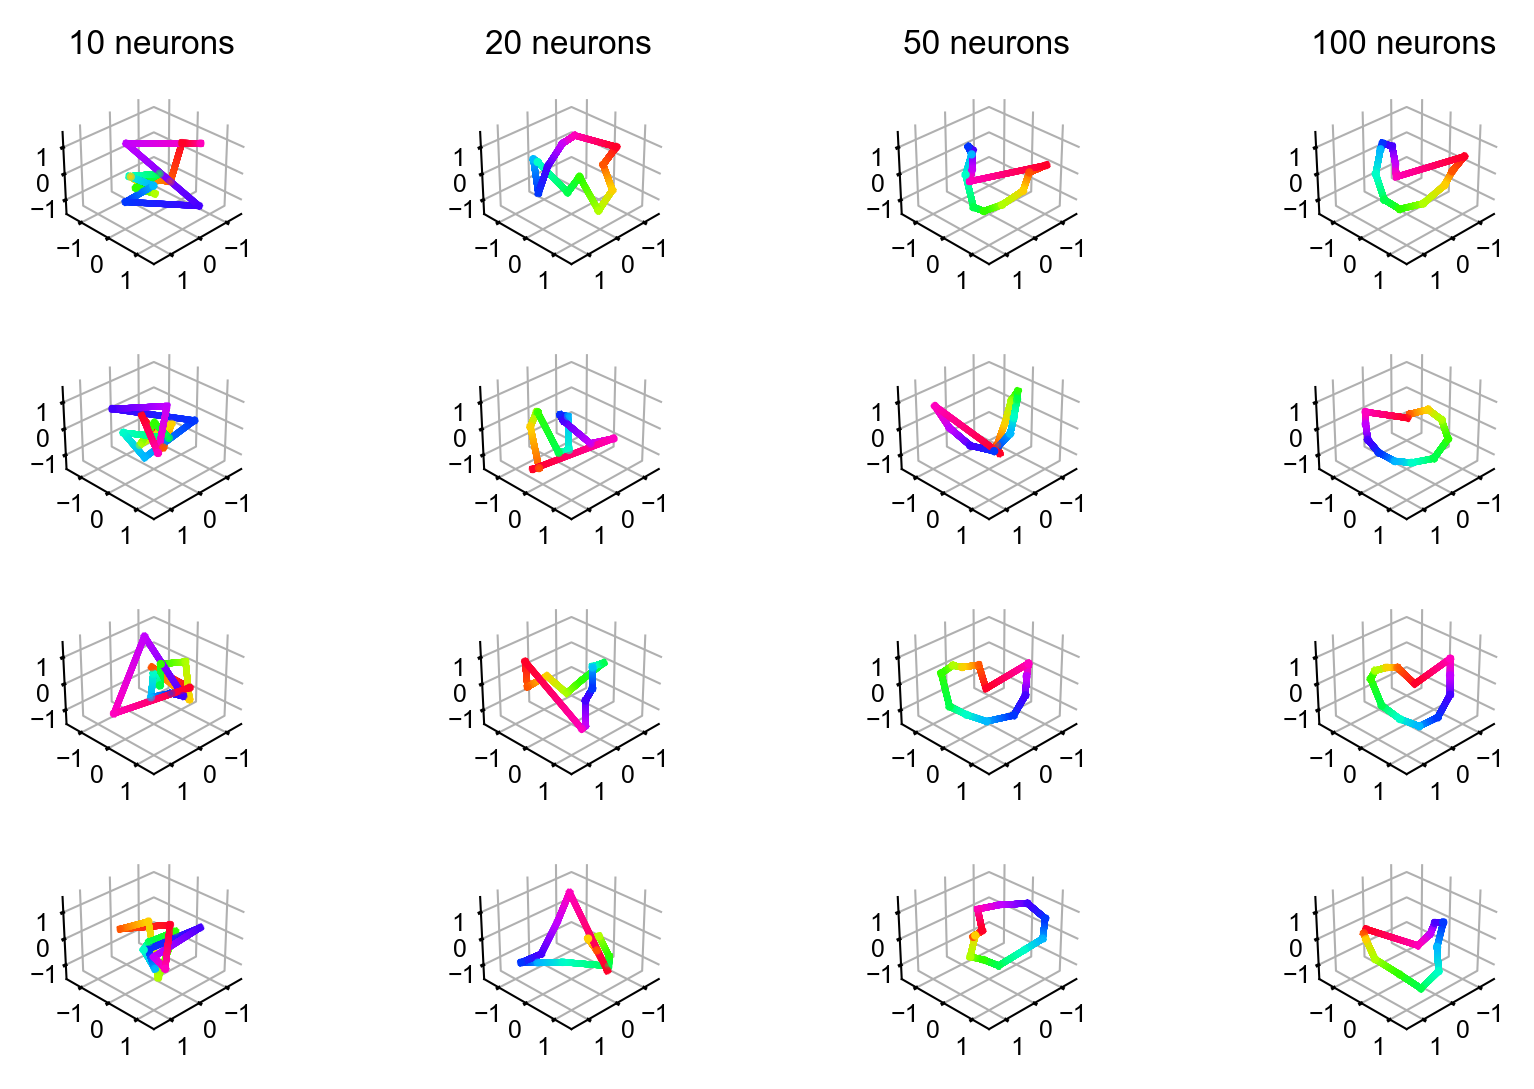

In [80]:
fig= plt.figure(figsize=(6.8, 3.6),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'



data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/different_neurons/')
MDS_non_ori_list = natsorted(glob.glob(data_path + 'MDS_signifi_non_ori_neurons_*.mat'))
select_subs = ['_10.mat', '_20.mat', '_50.mat', '_100.mat']
MDS_non_ori_list = [path for path in MDS_non_ori_list if any(sub in path for sub in select_subs)]

for k in range(len(MDS_non_ori_list)):
    MDS_ori = loadmat_data(MDS_non_ori_list[k])
    scaler = MinMaxScaler(feature_range=(-1,1))
    MDS_ori = scaler.fit_transform(MDS_ori)
    x = MDS_ori[:,0]
    y = -MDS_ori[:,1]
    z = -MDS_ori[:,2]

   
    angle = -90 
    theta = np.radians(angle) 
    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)


    ax=fig.add_subplot(4,len(select_subs),k+1, projection='3d')
    # ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')
    
    img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
    ax.set_xlim([-1.5, 1.5])  
    ax.set_ylim([-1.5, 1.5])  
    ax.set_zlim([-1.5, 1.5])  
    ax.tick_params(axis='both', which='both', pad=-5, 
                labelsize=tick_size, width=ax_linewidth)


   
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        # axis._axinfo['tick']['inward_factor'] = 0.5  
        axis._axinfo['tick']['outward_factor'] = 0.0  
        axis.pane.fill = False  
        axis.pane.set_edgecolor('w') 
        axis._axinfo["grid"]['linewidth'] = ax_linewidth
        axis.line.set_lw(ax_linewidth)  # 

    
    ax.view_init(elev=30, azim=45)
    
    for i in range(len(x_rotated)):
        color= img.to_rgba([i])
        if i==11:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([0])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[0], y_rotated[0], z[0])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
            # ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
        else:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([i+1])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[i+1], y_rotated[i+1], z[i+1])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
        
            # ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)
    if k==0:
        ax.text(10, -0.5, 4, 'Monkey A', fontsize=label_size) 
    ax.set_title(f'{neurons_number_list[k]:d} neurons', fontsize=label_size, rotation=0)



############################################ Monkey B #########################################           
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/different_neurons/')
MDS_non_ori_list = natsorted(glob.glob(data_path + 'MDS_signifi_non_ori_neurons_*.mat'))
select_subs = ['_10.mat', '_20.mat', '_50.mat', '_100.mat']
MDS_non_ori_list = [path for path in MDS_non_ori_list if any(sub in path for sub in select_subs)]

for k in range(len(MDS_non_ori_list)):
    MDS_ori = loadmat_data(MDS_non_ori_list[k])
    scaler = MinMaxScaler(feature_range=(-1,1))
    MDS_ori = scaler.fit_transform(MDS_ori)
    x = MDS_ori[:,0]
    y = MDS_ori[:,1]
    z = MDS_ori[:,2]
   
    angle = 135 
    theta = np.radians(angle) 
    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)

    if k == 2:
            x = -MDS_ori[:,0]
            y = MDS_ori[:,1]
            z = -MDS_ori[:,2]
           
            angle = 180 
            theta = np.radians(angle) 
            x_rotated = x * np.cos(theta) - y * np.sin(theta)
            y_rotated = x * np.sin(theta) + y * np.cos(theta)
            
    ax=fig.add_subplot(4,len(select_subs),k+1+len(select_subs), projection='3d')
    # ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')
    
    img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
    ax.set_xlim([-1.5, 1.5])  
    ax.set_ylim([-1.5, 1.5])  
    ax.set_zlim([-1.5, 1.5])  
    ax.tick_params(axis='both', which='both', pad=-5, 
                labelsize=tick_size, width=ax_linewidth)


   
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        # axis._axinfo['tick']['inward_factor'] = 0.5  
        axis._axinfo['tick']['outward_factor'] = 0.0  
        axis.pane.fill = False  
        axis.pane.set_edgecolor('w') 
        axis._axinfo["grid"]['linewidth'] = ax_linewidth
        axis.line.set_lw(ax_linewidth)  # 

    
    ax.view_init(elev=30, azim=45)
    
    for i in range(len(x_rotated)):
        color= img.to_rgba([i])
        if i==11:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([0])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[0], y_rotated[0], z[0])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
            # ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
        else:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([i+1])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[i+1], y_rotated[i+1], z[i+1])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
        
            # ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)
    if k==0:
        ax.text(10, -0.5, 4, 'Monkey B', fontsize=label_size) 
            
            
############################################ Monkey C #########################################           
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/different_neurons/')
MDS_non_ori_list = natsorted(glob.glob(data_path + 'MDS_signifi_non_ori_neurons_*.mat'))
select_subs = ['_10.mat', '_20.mat', '_50.mat', '_100.mat']
MDS_non_ori_list = [path for path in MDS_non_ori_list if any(sub in path for sub in select_subs)]

for k in range(len(MDS_non_ori_list)):
    MDS_ori = loadmat_data(MDS_non_ori_list[k])
    scaler = MinMaxScaler(feature_range=(-1,1))
    MDS_ori = scaler.fit_transform(MDS_ori)
    x = MDS_ori[:,0]
    y = MDS_ori[:,1]
    z = MDS_ori[:,2]

   
    angle = -95 
    theta = np.radians(angle) 
    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)

    if k == 2:
            x = MDS_ori[:,0]
            y = -MDS_ori[:,1]
            z = MDS_ori[:,2]
           
            angle = -150 
            theta = np.radians(angle) 
            x_rotated = x * np.cos(theta) - y * np.sin(theta)
            y_rotated = x * np.sin(theta) + y * np.cos(theta)
            
    ax=fig.add_subplot(4,len(select_subs),k+1+2*len(select_subs), projection='3d')
    # ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')
    
    img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
    ax.set_xlim([-1.5, 1.5])  
    ax.set_ylim([-1.5, 1.5])  
    ax.set_zlim([-1.5, 1.5])  
    ax.tick_params(axis='both', which='both', pad=-5, 
                labelsize=tick_size, width=ax_linewidth)


   
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        # axis._axinfo['tick']['inward_factor'] = 0.5  
        axis._axinfo['tick']['outward_factor'] = 0.0  
        axis.pane.fill = False  
        axis.pane.set_edgecolor('w') 
        axis._axinfo["grid"]['linewidth'] = ax_linewidth
        axis.line.set_lw(ax_linewidth)  # 

    
    ax.view_init(elev=30, azim=45)
    
    for i in range(len(x_rotated)):
        color= img.to_rgba([i])
        if i==11:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([0])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[0], y_rotated[0], z[0])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
            # ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
        else:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([i+1])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[i+1], y_rotated[i+1], z[i+1])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
        
            # ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)
    if k==0:
        ax.text(10, -0.5, 4, 'Monkey C', fontsize=label_size) 
            
            
            
############################################ Monkey D #########################################           
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/different_neurons/')
MDS_non_ori_list = natsorted(glob.glob(data_path + 'MDS_signifi_non_ori_neurons_*.mat'))
select_subs = ['_10.mat', '_20.mat', '_50.mat', '_100.mat']
MDS_non_ori_list = [path for path in MDS_non_ori_list if any(sub in path for sub in select_subs)]

for k in range(len(MDS_non_ori_list)):
    MDS_ori = loadmat_data(MDS_non_ori_list[k])
    scaler = MinMaxScaler(feature_range=(-1,1))
    MDS_ori = scaler.fit_transform(MDS_ori)
    x = MDS_ori[:,0]
    y = MDS_ori[:,1]
    z = MDS_ori[:,2]

   
    angle = -150 
    theta = np.radians(angle) 
    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)

    if k == 2:
            x = -MDS_ori[:,0]
            y = MDS_ori[:,1]
            z = -MDS_ori[:,2]
           
            angle = -180 
            theta = np.radians(angle) 
            x_rotated = x * np.cos(theta) - y * np.sin(theta)
            y_rotated = x * np.sin(theta) + y * np.cos(theta)
            
    ax=fig.add_subplot(4,len(select_subs),k+1+3*len(select_subs), projection='3d')
    # ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')
    
    img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
    ax.set_xlim([-1.5, 1.5])  
    ax.set_ylim([-1.5, 1.5])  
    ax.set_zlim([-1.5, 1.5])  
    ax.tick_params(axis='both', which='both', pad=-5, 
                labelsize=tick_size, width=ax_linewidth)


   
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        # axis._axinfo['tick']['inward_factor'] = 0.5  
        axis._axinfo['tick']['outward_factor'] = 0.0  
        axis.pane.fill = False  
        axis.pane.set_edgecolor('w') 
        axis._axinfo["grid"]['linewidth'] = ax_linewidth
        axis.line.set_lw(ax_linewidth)  # 

    
    ax.view_init(elev=30, azim=45)
    
    for i in range(len(x_rotated)):
        color= img.to_rgba([i])
        if i==11:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([0])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[0], y_rotated[0], z[0])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
            # ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
        else:
            color1= img.to_rgba([i])
            color2 = img.to_rgba([i+1])
            point1 = (x_rotated[i], y_rotated[i], z[i])
            point2 = (x_rotated[i+1], y_rotated[i+1], z[i+1])
            
            tmp_cmap = LinearSegmentedColormap.from_list('tmp_cmap', [color1, color2])
            
            
            num_points = 100
            x_tmp = np.linspace(point1[0], point2[0], num_points)
            y_tmp = np.linspace(point1[1], point2[1], num_points)
            z_tmp = np.linspace(point1[2], point2[2], num_points)
            
            for j in range(num_points - 1):
                ax.plot(x_tmp[j:j+2],
                        y_tmp[j:j+2],
                        z_tmp[j:j+2],
                        color = tmp_cmap(j / (num_points -1)))
        
            # ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)
    if k==0:
        ax.text(10, -0.5, 4, 'Monkey D', fontsize=label_size) 
plt.subplots_adjust(left=.13, bottom=.04, right=1, top=0.93, wspace=-0.2, hspace=0.3) 
plt.savefig('./Results/results2/Fig2.pdf', format='pdf', dpi=300)


# Results3

## Fig 3-A

In [15]:
ann_linewidth=1
box_linewidth=0.8
test_type = 'Mann-Whitney'
# test_type='t-test'
Neuron_name = 'Orientation-tuned neurons', 'Orientation-untuned neurons with stable weights', 'Orientation-untuned neurons with high stable weights'
dot_size=1.5

In [16]:
def compare_r(Monkey_path):
    data_path = os.path.join(Monkey_path, 'results4_explain/r_compare_signi_non_ori/r_compare.mat')
    r_compare_Monkey = np.squeeze(loadmat_data(data_path))
    
    _, p_normal_group0 = shapiro(r_compare_Monkey[0])
    _, p_normal_group1 = shapiro(r_compare_Monkey[1])
    _, p_normal_group2 = shapiro(r_compare_Monkey[2])
    
    
    _, p_levene = levene(r_compare_Monkey[0], r_compare_Monkey[1], r_compare_Monkey[2])
    
    alpha = 0.5
    
    pairs = [(r_compare_Monkey[0], r_compare_Monkey[1]),
            (r_compare_Monkey[1], r_compare_Monkey[2]),
            (r_compare_Monkey[2], r_compare_Monkey[0])]
    if all(p > alpha for p in [p_normal_group0, p_normal_group1, p_normal_group2]) and p_levene > alpha:
        print('para, Anova(F) and t-test(z)')
        statistic_anova, p_anova = f_oneway(r_compare_Monkey[0], r_compare_Monkey[1], r_compare_Monkey[2])
        statistic_test = [ttest_ind(pair[0], pair[1])[0] for pair in pairs]
        z_statistic = [t_to_z(pair[0], pair[1], statistic_test[i]) for i,pair in enumerate(pairs)]
        p_values_test = [ttest_ind(pair[0], pair[1])[1] for pair in pairs]
        reject, p_values_fdr, _, _ = multipletests(p_values_test, method='fdr_bh')
    else:
        print('non-para, Kruskal-Wallis test(H) and Mann-Whitney U test(z)')
        statistic_anova, p_anova = kruskal(r_compare_Monkey[0], r_compare_Monkey[1], r_compare_Monkey[2])
        statistic_test = [mannwhitneyu(pair[0], pair[1])[0] for pair in pairs]
        z_statistic = [u_to_z(pair[0], pair[1], statistic_test[i]) for i,pair in enumerate(pairs)]
        p_values_test = [mannwhitneyu(pair[0], pair[1])[1] for pair in pairs]
        reject, p_values_fdr, _, _ = multipletests(p_values_test, method='fdr_bh')
    print(f'mutil-group statistic: {statistic_anova:.3f}')
    print(f'mutil-group p-value: {p_anova:.3e},  p-value: {p_anova:.4f} ')
    print(f'pairs reject: {reject}')
    print(f'pairs z-value: {z_statistic}')
    print(f'pairs p-value: {p_values_fdr}')
    return p_values_fdr

In [ ]:
p_values_fdr_MonkeyA = compare_r(MonkeyA_path)
p_values_fdr_MonkeyB = compare_r(MonkeyB_path)
p_values_fdr_MonkeyC = compare_r(MonkeyC_path)
p_values_fdr_MonkeyD = compare_r(MonkeyD_path)

In [18]:
p = 7.39734243e-01
print(f'{p:.4f}')

0.7397


/home/yjzhong/application/miniconda3/envs/work_base/lib/python3.8/site-packages/statannotations/Annotator.py:813: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Monkey A_orientation-tuned neurons vs. Monkey A_orientation-untuned neurons: Custom statistical test, P_val:1.130e-03
Monkey A_orientation-untuned neurons vs. Monkey A_high-orientation-untuned neurons: Custom statistical test, P_val:1.130e-03
Monkey A_orientation-tuned neurons vs. Monkey A_high-orientation-untuned neurons: Custom statistical test, P_val:1.787e-01


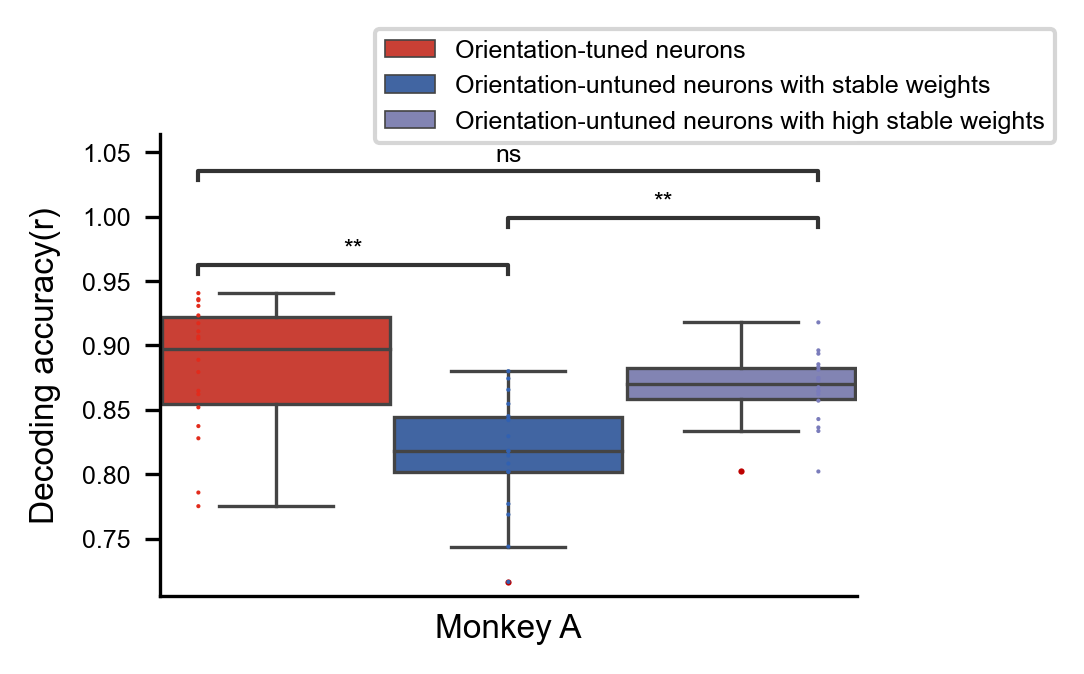

In [42]:
fig= plt.figure(figsize=(3, 2),facecolor='none', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

#################################################### MonkeyA #############################################
data_path = os.path.join(MonkeyA_path, 'results4_explain/r_compare_signi_non_ori/r_compare.mat')
r_compare_MonkeyA = np.squeeze(loadmat_data(data_path))

r_compare = np.hstack([r_compare_MonkeyA[0], r_compare_MonkeyA[1], r_compare_MonkeyA[2]])

monkey_name = ['Monkey A'] * len(r_compare)

ori_string = ['orientation-tuned neurons'] * r_compare_MonkeyA.shape[-1]
non_ori_string = ['orientation-untuned neurons'] * r_compare_MonkeyA.shape[-1]
signifi_non_ori_string = ['high-orientation-untuned neurons'] * r_compare_MonkeyA.shape[-1]
class_neuron = np.squeeze(np.array(ori_string + non_ori_string + signifi_non_ori_string))
columns = ['neuron class']
r_df = pd.DataFrame(class_neuron, columns=columns)
r_df['r'] = r_compare
r_df['monkey name'] = monkey_name

ax=fig.add_subplot(1, 1, 1)
sns.boxplot(data=r_df, x=r_df['monkey name'], y=r_df['r'], hue=r_df['neuron class'], ax=ax, palette=neuron_color_3compare,
            flierprops = dict(marker='o', markerfacecolor='#BD0100', markersize=1.5, markeredgecolor='none'),
            width=0.6, linewidth=box_linewidth, whis = 1.5)
ax.legend().set_visible(False)
plot = sns.stripplot(x='monkey name', y='r', data=r_df, hue=r_df['neuron class'], palette=neuron_color_3compare, dodge=True, jitter=False, size=1)
box_pairs =[(('Monkey A', 'orientation-tuned neurons'),('Monkey A', 'orientation-untuned neurons')),
            (('Monkey A', 'orientation-untuned neurons'), ('Monkey A', 'high-orientation-untuned neurons')),
            (('Monkey A', 'high-orientation-untuned neurons'), ('Monkey A', 'orientation-tuned neurons'))]
annotator = Annotator(ax, pairs=box_pairs, data=r_df, x='monkey name', y='r', hue='neuron class')
# annotator.configure(test=test_type , text_format='star', 
#                     line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
# annotator.apply_and_annotate()
annotator.set_pvalues([p_values_fdr_MonkeyA[0],
                       p_values_fdr_MonkeyA[1],
                       p_values_fdr_MonkeyA[2]])
annotator.configure(line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
annotator.annotate()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=tick_size)


ax.set_xlabel('Monkey A', fontsize=label_size)
ax.set_ylabel('Decoding accuracy(r)', fontsize=label_size, labelpad=5)

handles, labels = plot.get_legend_handles_labels()
labels = Neuron_name
ax.legend(handles=handles, labels=labels,
    loc="center left",
    ncol=1,
    bbox_to_anchor=(0.35, 0.96),
    bbox_transform=fig.transFigure,
    fontsize=legend_size
)

/home/yjzhong/application/miniconda3/envs/work_base/lib/python3.8/site-packages/statannotations/Annotator.py:813: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

orientation-tuned neurons vs. orientation-untuned neurons: Custom statistical test, P_val:1.130e-03
orientation-untuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:1.130e-03
orientation-tuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:1.787e-01


/home/yjzhong/application/miniconda3/envs/work_base/lib/python3.8/site-packages/statannotations/Annotator.py:813: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

orientation-tuned neurons vs. orientation-untuned neurons: Custom statistical test, P_val:6.289e-03
orientation-untuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:6.737e-06
orientation-tuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:7.397e-01


/home/yjzhong/application/miniconda3/envs/work_base/lib/python3.8/site-packages/statannotations/Annotator.py:813: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

orientation-tuned neurons vs. orientation-untuned neurons: Custom statistical test, P_val:7.910e-02
orientation-untuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:1.646e-04
orientation-tuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:5.735e-02


/home/yjzhong/application/miniconda3/envs/work_base/lib/python3.8/site-packages/statannotations/Annotator.py:813: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

orientation-tuned neurons vs. orientation-untuned neurons: Custom statistical test, P_val:3.553e-02
orientation-untuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:3.174e-03
orientation-tuned neurons vs. high-orientation-untuned neurons: Custom statistical test, P_val:2.750e-01


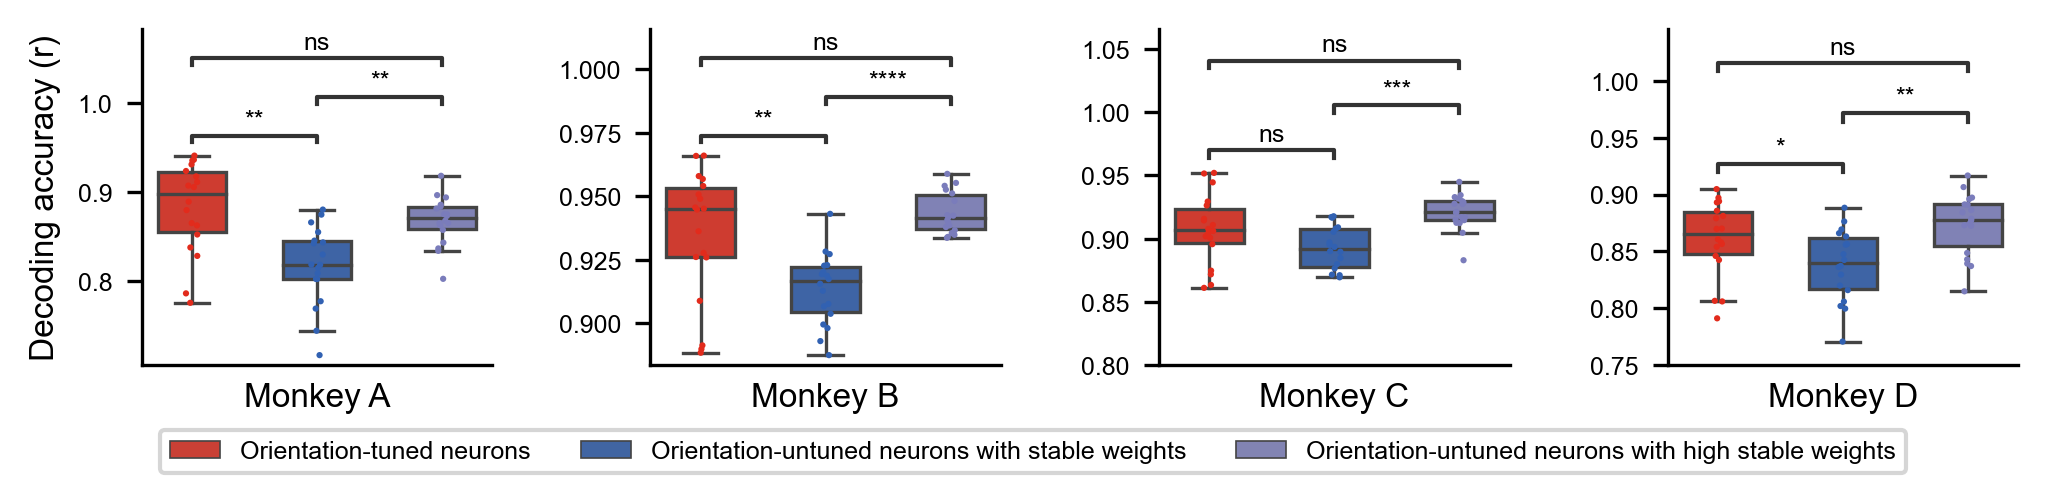

In [38]:
fig= plt.figure(figsize=(6.8, 1.6),facecolor='none', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

#################################################### MonkeyA #############################################
data_path = os.path.join(MonkeyA_path, 'results4_explain/r_compare_signi_non_ori/r_compare.mat')
r_compare_MonkeyA = np.squeeze(loadmat_data(data_path))

r_compare = np.hstack([r_compare_MonkeyA[0], r_compare_MonkeyA[1], r_compare_MonkeyA[2]])

monkey_name = ['Monkey A'] * len(r_compare)

ori_string = ['orientation-tuned neurons'] * r_compare_MonkeyA.shape[-1]
non_ori_string = ['orientation-untuned neurons'] * r_compare_MonkeyA.shape[-1]
signifi_non_ori_string = ['high-orientation-untuned neurons'] * r_compare_MonkeyA.shape[-1]
class_neuron = np.squeeze(np.array(ori_string + non_ori_string + signifi_non_ori_string))
columns = ['neuron class']
r_df = pd.DataFrame(class_neuron, columns=columns)
r_df['r'] = r_compare
r_df['monkey name'] = monkey_name

ax=fig.add_subplot(1, 4, 1)
sns.boxplot(data=r_df, x=r_df['neuron class'], y=r_df['r'], ax=ax, palette=neuron_color_3compare,
            showfliers=False, width=0.55, linewidth=box_linewidth, whis = 1.5, saturation=0.8)
sns.stripplot(x='neuron class', y='r', data=r_df, hue='neuron class', palette=neuron_color_3compare, dodge=False, jitter=0.05, size=dot_size, ax=ax)
ax.legend().set_visible(False)

box_pairs =[('orientation-tuned neurons', 'orientation-untuned neurons'),
            ('orientation-untuned neurons', 'high-orientation-untuned neurons'),
            ('high-orientation-untuned neurons', 'orientation-tuned neurons')]
annotator = Annotator(ax, pairs=box_pairs, data=r_df, x='neuron class', y='r')
# annotator.configure(test=test_type , text_format='star', 
#                     line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
# annotator.apply_and_annotate()
annotator.set_pvalues([p_values_fdr_MonkeyA[0],
                       p_values_fdr_MonkeyA[1],
                       p_values_fdr_MonkeyA[2]])
annotator.configure(line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
annotator.annotate()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=tick_size)


ax.set_xlabel('Monkey A', fontsize=label_size)
ax.set_ylabel('Decoding accuracy (r)', fontsize=label_size)

#################################################### MonkeyB #############################################
data_path = os.path.join(MonkeyB_path, 'results4_explain/r_compare_signi_non_ori/r_compare.mat')
r_compare_MonkeyB = np.squeeze(loadmat_data(data_path))

r_compare = np.hstack([r_compare_MonkeyB[0], r_compare_MonkeyB[1], r_compare_MonkeyB[2]])

ori_string = ['orientation-tuned neurons'] * r_compare_MonkeyB.shape[-1]
non_ori_string = ['orientation-untuned neurons'] * r_compare_MonkeyB.shape[-1]
signifi_non_ori_string = ['high-orientation-untuned neurons'] * r_compare_MonkeyB.shape[-1]
class_neuron = np.squeeze(np.array(ori_string + non_ori_string + signifi_non_ori_string))
columns = ['neuron class']
r_df = pd.DataFrame(class_neuron, columns=columns)
r_df['r'] = r_compare

ax=fig.add_subplot(1, 4, 2)
sns.boxplot(data=r_df, x=r_df['neuron class'], y=r_df['r'], ax=ax, palette=neuron_color_3compare,
            showfliers=False, width=0.55, linewidth=box_linewidth, whis = 1.5, saturation=0.8)
sns.stripplot(x='neuron class', y='r', data=r_df, hue='neuron class', palette=neuron_color_3compare, dodge=False, jitter=0.05, size=dot_size, ax=ax)
ax.legend().set_visible(False)

box_pairs =[('orientation-tuned neurons', 'orientation-untuned neurons'),
            ('orientation-untuned neurons', 'high-orientation-untuned neurons'),
            ('high-orientation-untuned neurons', 'orientation-tuned neurons')]
annotator = Annotator(ax, pairs=box_pairs, data=r_df, x='neuron class', y='r')
# annotator.configure(test=test_type , text_format='star', 
#                     line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
# annotator.apply_and_annotate()
annotator.set_pvalues([p_values_fdr_MonkeyB[0],
                       p_values_fdr_MonkeyB[1],
                       p_values_fdr_MonkeyB[2]])
annotator.configure(line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
annotator.annotate()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=tick_size)


ax.set_xlabel('Monkey B', fontsize=label_size)
ax.set_ylabel('')
#################################################### MonkeyC #############################################
data_path = os.path.join(MonkeyC_path, 'results4_explain/r_compare_signi_non_ori/r_compare.mat')
r_compare_MonkeyC = np.squeeze(loadmat_data(data_path))

r_compare = np.hstack([r_compare_MonkeyC[0], r_compare_MonkeyC[1], r_compare_MonkeyC[2]])

ori_string = ['orientation-tuned neurons'] * r_compare_MonkeyC.shape[-1]
non_ori_string = ['orientation-untuned neurons'] * r_compare_MonkeyC.shape[-1]
signifi_non_ori_string = ['high-orientation-untuned neurons'] * r_compare_MonkeyC.shape[-1]
class_neuron = np.squeeze(np.array(ori_string + non_ori_string + signifi_non_ori_string))
columns = ['neuron class']
r_df = pd.DataFrame(class_neuron, columns=columns)
r_df['r'] = r_compare

# ax.legend().set_visible(True)
ax=fig.add_subplot(1, 4, 3)
sns.boxplot(data=r_df, x=r_df['neuron class'], y=r_df['r'], ax=ax, palette=neuron_color_3compare,
            showfliers=False, width=0.55, linewidth=box_linewidth, whis = 1.5, saturation=0.8)
ax.set_ylim(0.8,1.0)
sns.stripplot(x='neuron class', y='r', data=r_df, hue='neuron class', palette=neuron_color_3compare, dodge=False, jitter=0.05, size=dot_size, ax=ax)
ax.legend().set_visible(False)

box_pairs =[('orientation-tuned neurons', 'orientation-untuned neurons'),
            ('orientation-untuned neurons', 'high-orientation-untuned neurons'),
            ('high-orientation-untuned neurons', 'orientation-tuned neurons')]
annotator = Annotator(ax, pairs=box_pairs, data=r_df, x='neuron class', y='r')
# annotator.configure(test=test_type , text_format='star', comparisons_correction="BH",
#                     line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
# annotator.apply_and_annotate()
annotator.set_pvalues([p_values_fdr_MonkeyC[0],
                       p_values_fdr_MonkeyC[1],
                       p_values_fdr_MonkeyC[2]])
annotator.configure(line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
annotator.annotate()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=tick_size)


ax.set_xlabel('Monkey C', fontsize=label_size)
ax.set_ylabel('')

#################################################### MonkeyD #############################################
data_path = os.path.join(MonkeyD_path, 'results4_explain/r_compare_signi_non_ori/r_compare.mat')
r_compare_MonkeyD = np.squeeze(loadmat_data(data_path))

r_compare = np.hstack([r_compare_MonkeyD[0], r_compare_MonkeyD[1], r_compare_MonkeyD[2]])

ori_string = ['orientation-tuned neurons'] * r_compare_MonkeyD.shape[-1]
non_ori_string = ['orientation-untuned neurons'] * r_compare_MonkeyD.shape[-1]
signifi_non_ori_string = ['high-orientation-untuned neurons'] * r_compare_MonkeyD.shape[-1]
class_neuron = np.squeeze(np.array(ori_string + non_ori_string + signifi_non_ori_string))
columns = ['neuron class']
r_df = pd.DataFrame(class_neuron, columns=columns)
r_df['r'] = r_compare

# ax.legend().set_visible(True)
ax=fig.add_subplot(1, 4, 4)
sns.boxplot(data=r_df, x=r_df['neuron class'], y=r_df['r'], ax=ax, palette=neuron_color_3compare,
            showfliers=False, width=0.55, linewidth=box_linewidth, whis = 1.5, saturation=0.8)
ax.set_ylim(0.75,1.0)
sns.stripplot(x='neuron class', y='r', data=r_df, hue='neuron class', palette=neuron_color_3compare, dodge=False, jitter=0.05, size=dot_size, ax=ax)

# for i, artist in enumerate(ax.artists):
#     col = artist.get_facecolor()
#     for j in range(i*18, (i+1)*18):
#         x, y = r_df['neuron class'][j], r_df['r'][j]
#         ax.plot([i, i], [y, y], 'o', color=col, markersize=dot_size)
        
ax.legend().set_visible(False)

box_pairs =[('orientation-tuned neurons', 'orientation-untuned neurons'),
            ('orientation-untuned neurons', 'high-orientation-untuned neurons'),
            ('high-orientation-untuned neurons', 'orientation-tuned neurons')]
annotator = Annotator(ax, pairs=box_pairs, data=r_df, x='neuron class', y='r')
# annotator.configure(test=test_type , text_format='star', comparisons_correction="BH",
#                     line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
# annotator.apply_and_annotate()
annotator.set_pvalues([p_values_fdr_MonkeyD[0],
                       p_values_fdr_MonkeyD[1],
                       p_values_fdr_MonkeyD[2]])
annotator.configure(line_height=0.03, line_width=ann_linewidth, fontsize=legend_size, loc='inside')
annotator.annotate()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=tick_size)


ax.set_xlabel('Monkey D', fontsize=label_size)
ax.set_ylabel('')

ax.legend(handles=handles, labels=labels,
    loc="center left",
    ncol=3,
    bbox_to_anchor=(0.073, 0.07),
    bbox_transform=fig.transFigure,
    fontsize=legend_size
)

plt.subplots_adjust(left=.07, bottom=.25, right=0.99, top=0.95, wspace=0.45, hspace=None) 
plt.savefig('./Results/results3/Fig3_A.pdf', format='pdf', dpi=300)


## Fig 3-B

In [43]:
ax_linewidth = 0.5
cb_linewidth = 0.5

from matplotlib.colors import LinearSegmentedColormap
def create_custom_cmap():
    colors = ['#5A83BC', '#FFFFFF']  
    cmap_name = 'custom_blue_white'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

custom_cmap = create_custom_cmap()

### Orientation-tuned neurons

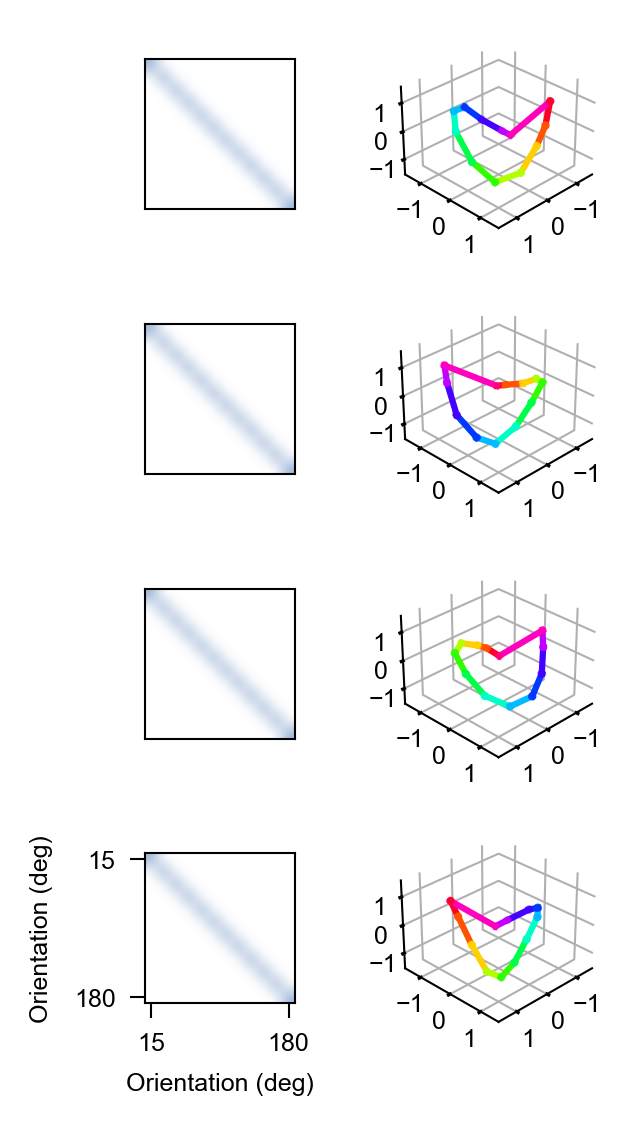

In [44]:
fig= plt.figure(figsize=(2, 3.6),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'
x_tick_rotation = 90 
x_start = 0.23
y_start = 0.8
fram_width_rdm = 0.25
fram_height = 0.23
x_interval = fram_width_rdm + 0.16
y_interval = fram_height + 0.015
fram_width_mds = 0.35


################################ Monkey A - RDM ############################
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/RDM_ori_12.mat')
RDM_ori = loadmat_data(data_path)

ax=fig.add_axes([x_start ,y_start, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)

ax.set_frame_on(True)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  



################################ Monkey A - MDS ############################
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/MDS_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -90 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(422, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')

img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)



################################ Monkey B - RDM ############################
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/RDM_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(423)
ax=fig.add_axes([x_start ,y_start-y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
################################ Monkey B - MDS ############################
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/MDS_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = 180 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(424, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-y_interval, fram_width_mds, fram_height], projection='3d')

img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)



################################ Monkey C - RDM ############################
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/RDM_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(425)
ax=fig.add_axes([x_start ,y_start-2*y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
################################ Monkey C - MDS ############################
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/MDS_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -90 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(426, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-2*y_interval, fram_width_mds, fram_height], projection='3d')

img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


################################ Monkey D - RDM ############################
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/RDM_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(427)
ax=fig.add_axes([x_start ,y_start-3*y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('Orientation (deg)', fontsize=tick_size)
ax.set_ylabel('Orientation (deg)', fontsize=tick_size, labelpad=5)


ax.tick_params(axis='x', labelsize=tick_size, width=ax_linewidth)
ax.tick_params(axis='y', labelsize=tick_size, width=ax_linewidth)

x = [0,11]
x_label_name = ['15', '180']
ax.set_xticks(x)
ax.set_xticklabels(x_label_name , rotation=0) 
ax.set_yticks(x)
ax.set_yticklabels(x_label_name ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
    

################################ Monkey D - MDS ############################
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/MDS_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -150 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(428, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-3*y_interval, fram_width_mds, fram_height], projection='3d')

img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


# ax=fig.add_subplot(4, 2, 7)
# # last 
# 
# ax.set_xlabel('Orientation(deg)', fontsize=label_size)
# ax.set_ylabel('Orientation(deg)', fontsize=label_size, labelpad=5)

# 
# 
# ax.tick_params(axis='x', labelsize=tick_size, width=ax_linewidth)
# ax.tick_params(axis='y', labelsize=tick_size, width=ax_linewidth)
# 
# x = [0,11]
# x_label_name = ['15', '180']
# ax.set_xticks(x)
# ax.set_xticklabels(x_label_name , rotation=0) 
# ax.set_yticks(x)
# ax.set_yticklabels(x_label_name ,rotation=0)

# for spine in ax.spines.values():
#     spine.set_linewidth(ax_linewidth)  

# plt.subplots_adjust(left=.058, bottom=.25, right=0.97, top=0.95, wspace=0.3, hspace=0.3) 

plt.savefig('./Results/results3/Fig3_B_ori.pdf', format='pdf', dpi=300)



### Orientation-untuned neurons with stable weights

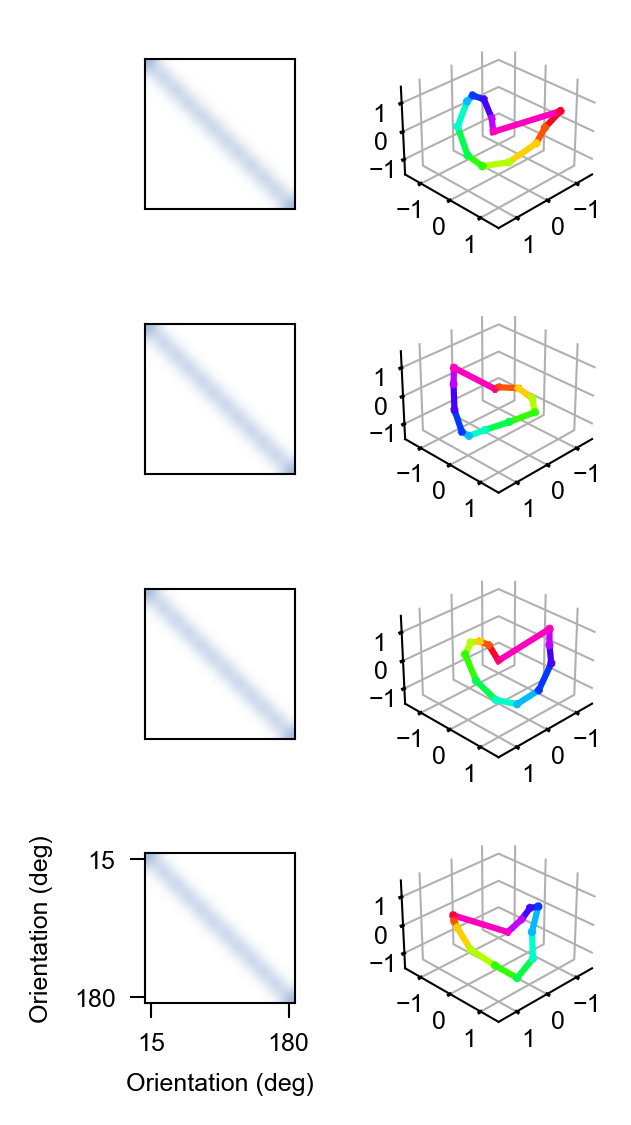

In [45]:
fig= plt.figure(figsize=(2, 3.6),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'
x_tick_rotation = 90 
x_start = 0.23
y_start = 0.8
fram_width_rdm = 0.25
fram_height = 0.23
x_interval = fram_width_rdm + 0.16
y_interval = fram_height + 0.015
fram_width_mds = 0.35


################################ Monkey A - RDM ############################
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/RDM_signifi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(421)
ax=fig.add_axes([x_start ,y_start, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  

################################ Monkey A - MDS ############################
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/MDS_signifi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = -MDS_ori[:,1]
z = -MDS_ori[:,2]


angle = 90 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(422, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')

img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')

ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  

ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)

################################ Monkey B - RDM ############################
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/RDM_signifi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(423)
ax=fig.add_axes([x_start ,y_start-y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
################################ Monkey B - MDS ############################
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/MDS_signifi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = 120 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(424, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-y_interval, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


################################ Monkey C - RDM ############################
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/RDM_signifi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(425)
ax=fig.add_axes([x_start ,y_start-2*y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
################################ Monkey C - MDS ############################
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/MDS_signifi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -95 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(426, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-2*y_interval, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


################################ Monkey D - RDM ############################
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/RDM_signifi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(427)
ax=fig.add_axes([x_start ,y_start-3*y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('Orientation (deg)', fontsize=tick_size)
ax.set_ylabel('Orientation (deg)', fontsize=tick_size, labelpad=5)


ax.tick_params(axis='x', labelsize=tick_size, width=ax_linewidth)
ax.tick_params(axis='y', labelsize=tick_size, width=ax_linewidth)

x = [0,11]
x_label_name = ['15', '180']
ax.set_xticks(x)
ax.set_xticklabels(x_label_name , rotation=0) 
ax.set_yticks(x)
ax.set_yticklabels(x_label_name ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
    
################################ Monkey D - MDS ############################
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/MDS_signifi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -150 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(428, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-3*y_interval, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)

# plt.savefig('./Results/results4/Fig5_B_non_ori.pdf', format='pdf', dpi=300)
plt.savefig('./Results/results3/Fig3_B_non_ori.pdf', format='pdf', dpi=300)


### Orientation-untuned neurons with high stable weights

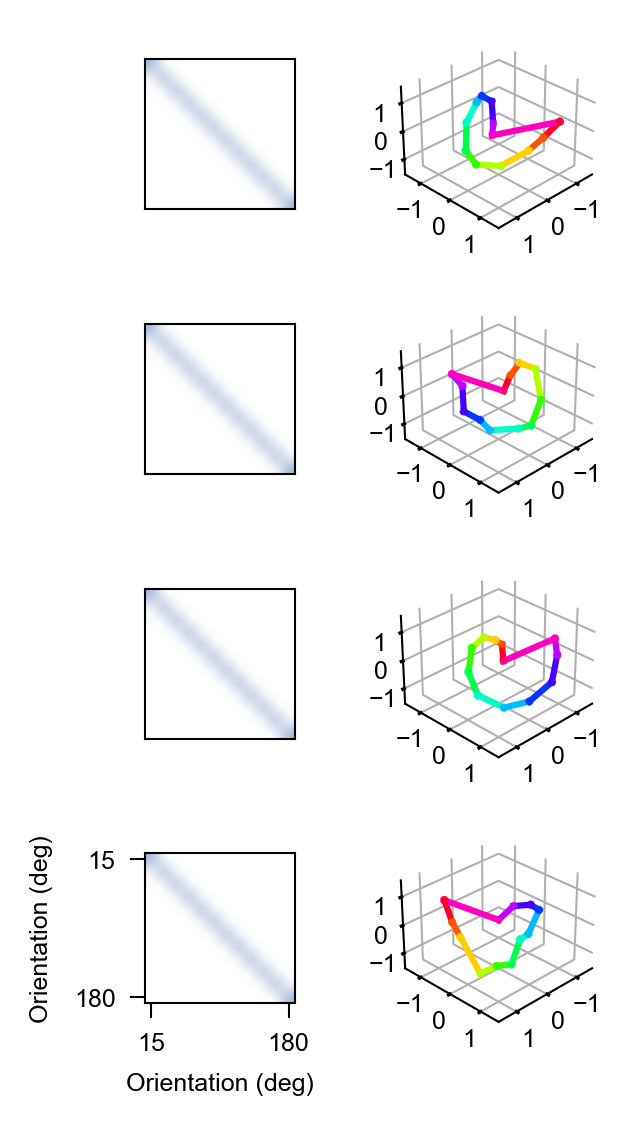

In [46]:
fig= plt.figure(figsize=(2, 3.6),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'
x_tick_rotation = 90 
x_start = 0.23
y_start = 0.8
fram_width_rdm = 0.25
fram_height = 0.23
x_interval = fram_width_rdm + 0.16
y_interval = fram_height + 0.015
fram_width_mds = 0.35


################################ Monkey A - RDM ############################
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/RDM_high_weight_signigi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(421)
ax=fig.add_axes([x_start ,y_start, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  

################################ Monkey A - MDS ############################
data_path = os.path.join(MonkeyA_path, 'results4_explain/geometry/MDS_high_weight_signigi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = -MDS_ori[:,1]
z = -MDS_ori[:,2]


angle = -100 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(422, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')

ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  

ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


################################ Monkey B - RDM ############################
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/RDM_high_weight_signigi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(423)
ax=fig.add_axes([x_start ,y_start-y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
################################ Monkey B - MDS ############################
data_path = os.path.join(MonkeyB_path, 'results4_explain/geometry/MDS_high_weight_signigi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -5 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(424, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-y_interval, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


################################ Monkey C - RDM ############################
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/RDM_high_weight_signigi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(425)
ax=fig.add_axes([x_start ,y_start-2*y_interval, fram_width_rdm, fram_height])


img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('', fontsize=label_size)
ax.set_ylabel('', fontsize=label_size, labelpad=5)


ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.set_xticklabels('' , rotation=0) 
ax.set_yticklabels('' ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
################################ Monkey C - MDS ############################
data_path = os.path.join(MonkeyC_path, 'results4_explain/geometry/MDS_high_weight_signigi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = -105 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(426, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-2*y_interval, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)


################################ Monkey D - RDM ############################
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/RDM_high_weight_signigi_non_ori_12.mat')
RDM_ori = loadmat_data(data_path)

# ax=fig.add_subplot(427)
ax=fig.add_axes([x_start ,y_start-3*y_interval, fram_width_rdm, fram_height])

img = ax.imshow(RDM_ori, cmap=custom_cmap, alpha=0.6, interpolation='bicubic')

ax.set_xlabel('Orientation (deg)', fontsize=tick_size)
ax.set_ylabel('Orientation (deg)', fontsize=tick_size, labelpad=5)


ax.tick_params(axis='x', labelsize=tick_size, width=ax_linewidth)
ax.tick_params(axis='y', labelsize=tick_size, width=ax_linewidth)

x = [0,11]
x_label_name = ['15', '180']
ax.set_xticks(x)
ax.set_xticklabels(x_label_name , rotation=0) 
ax.set_yticks(x)
ax.set_yticklabels(x_label_name ,rotation=0)
for spine in ax.spines.values():
    spine.set_linewidth(ax_linewidth)  
    
################################ Monkey D - MDS ############################
data_path = os.path.join(MonkeyD_path, 'results4_explain/geometry/MDS_high_weight_signigi_non_ori_12.mat')
MDS_ori = loadmat_data(data_path)
scaler = MinMaxScaler(feature_range=(-1,1))
MDS_ori = scaler.fit_transform(MDS_ori)
x = MDS_ori[:,0]
y = MDS_ori[:,1]
z = MDS_ori[:,2]


angle = 180 
theta = np.radians(angle) 
x_rotated = x * np.cos(theta) - y * np.sin(theta)
y_rotated = x * np.sin(theta) + y * np.cos(theta)

# ax=fig.add_subplot(428, projection='3d')
ax=fig.add_axes([x_start+x_interval ,y_start-3*y_interval, fram_width_mds, fram_height], projection='3d')


img = ax.scatter(x_rotated, y_rotated, z, s=1,c=np.arange(len(x)), marker='o', cmap='gist_rainbow', label='Data Points')
ax.set_xlim([-1.5, 1.5])  
ax.set_ylim([-1.5, 1.5])  
ax.set_zlim([-1.5, 1.5])  
ax.tick_params(axis='both', which='both', pad=-5, 
               labelsize=tick_size, width=ax_linewidth)



for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # axis._axinfo['tick']['inward_factor'] = 0.5  
    axis._axinfo['tick']['outward_factor'] = 0.0  
    axis.pane.fill = False  
    axis.pane.set_edgecolor('w') 
    axis._axinfo["grid"]['linewidth'] = ax_linewidth
    axis.line.set_lw(ax_linewidth)  # 


ax.view_init(elev=30, azim=45)

for i in range(len(x_rotated)):
    color = img.to_rgba([i])  
    if i==11:
        ax.plot([x_rotated[i], x_rotated[0]], [y_rotated[i], y_rotated[0]], [z[i], z[0]], color=color)
    else:
        ax.plot([x_rotated[i], x_rotated[i+1]], [y_rotated[i], y_rotated[i+1]], [z[i], z[i+1]], color=color)

plt.savefig('./Results/results3/Fig3_B_non_ori_high.pdf', format='pdf', dpi=300)

# Results4

In [47]:
ann_results_df = pd.DataFrame(columns=['name','layer', 'similarity', 'accuarcy', 'Non_number', 'Non_percent'])


new_data = {'name': 'ResNet-101', 'layer': 'layer2', 'similarity': 0.7870047135663839, 'accuarcy':0.744718492031097, 'Non_number':56237, 'Non_percent': 0.1400993502869898}
ann_results_df = pd.concat([ann_results_df, pd.DataFrame([new_data])], ignore_index =True)


new_data = {'name': 'CORnet-S', 'layer': 'module.V2', 'similarity': 0.6605347404321037, 'accuarcy':0.713066875934601, 'Non_number':14885, 'Non_percent': 0.14832788584183673}
ann_results_df = pd.concat([ann_results_df, pd.DataFrame([new_data])], ignore_index =True)

new_data = {'name': 'VGG-16', 'layer': 'features.19', 'similarity': 0.8235308312285838, 'accuarcy':0.854412615299225, 'Non_number':206131, 'Non_percent': 0.5135199099170918}
ann_results_df = pd.concat([ann_results_df, pd.DataFrame([new_data])], ignore_index =True)

new_data = {'name': 'AlexNet', 'layer': 'features.5', 'similarity': 0.8374060906356074, 'accuarcy':0.421444535255432, 'Non_number':3143, 'Non_percent': 0.09689349112426035}
ann_results_df = pd.concat([ann_results_df, pd.DataFrame([new_data])], ignore_index =True)


new_data = {'name': 'SqueezeNet', 'layer': 'features.6', 'similarity': 0.8220025417866508, 'accuarcy':0.780158579349518, 'Non_number':29607, 'Non_percent': 0.15864519032921812}
ann_results_df = pd.concat([ann_results_df, pd.DataFrame([new_data])], ignore_index =True)

custom_order = ['AlexNet', 'VGG-16', 'ResNet-101', 'SqueezeNet', 'CORnet-S']

In [48]:
Non_percent = np.array(ann_results_df['Non_percent'])
Non_number = np.array(ann_results_df['Non_number'])
On_number = np.divide(Non_number, Non_percent)

In [49]:
custom_palette = sns.color_palette('RdBu', n_colors=11)[1:4] + sns.color_palette('RdBu', n_colors=11)[-3:-1]

### Fig 4-C

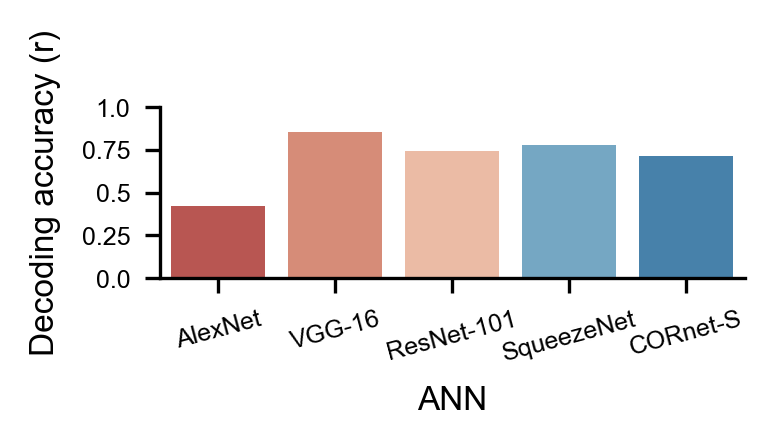

In [50]:
fig = plt.figure(figsize=(2.5,1.5),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

ax = sns.barplot(x='name', y='accuarcy', data=ann_results_df , order=custom_order,
                 estimator=np.mean, palette=custom_palette)
ax.set_xlabel('ANN',fontsize=label_size, labelpad=5)
ax.set_ylabel('Decoding accuracy (r)', fontsize=label_size, labelpad=5)



ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)


# x_label_name = ann_results_df['name']
x_label_name = custom_order
ax.set_xticklabels(x_label_name, rotation=15) 

y_label = np.arange(0, 1.1, 0.25)
y_label = np.round(y_label, 2) 
ax.set_yticks(y_label) 
ax.set_yticklabels(y_label, rotation =0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.subplots_adjust(left=.18, bottom=.45, right=0.96, top=0.83, wspace=None, hspace=None) 
plt.savefig('./Results/results4/Fig4_C.pdf', format='pdf', dpi=300)

### Fig 4-B

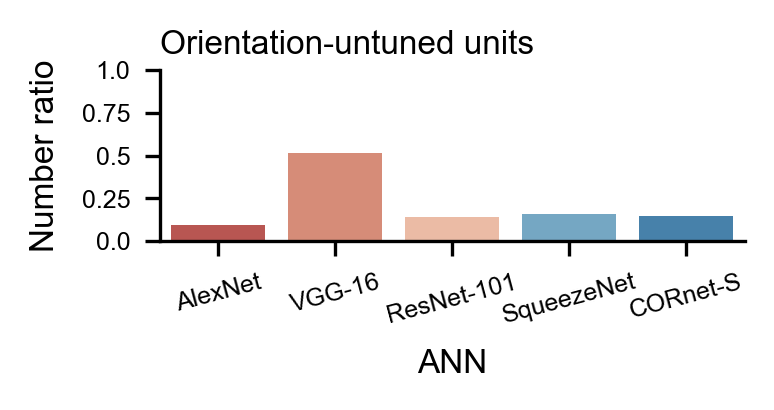

In [51]:
fig = plt.figure(figsize=(2.5,1.5),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

ax = sns.barplot(x='name', y='Non_percent', data=ann_results_df , order=custom_order,
                 estimator=np.mean, palette=custom_palette)
ax.set_xlabel('ANN',fontsize=label_size, labelpad=5)
ax.set_ylabel('Number ratio', fontsize=label_size, labelpad=5)
ax.set_title('Orientation-untuned units', loc='left', fontsize=label_size, y=0.95)




ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)


# x_label_name = ann_results_df['name']
x_label_name = custom_order
ax.set_xticklabels(x_label_name, rotation=15) 

y_label = np.arange(0, 1.1, 0.25)
y_label = np.round(y_label, 2) 
ax.set_yticks(y_label) 
ax.set_yticklabels(y_label, rotation =0)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=.18, bottom=.45, right=0.96, top=0.83, wspace=None, hspace=None) 

plt.savefig('./Results/results4/Fig4_B.pdf', format='pdf', dpi=300)

In [70]:
data_path = './ANN_Monkey_compare/results1_pre_non_ori/predicted_all.mat'
predicted_all = np.squeeze(loadmat_data(data_path))
data_path = 'ANN_Monkey_compare/results1_pre_non_ori/Y_test_all.mat'
Y_test_all = np.squeeze(loadmat_data(data_path))

In [71]:

r_mean = 0.7919
p_mean = 5.6210e-40
MAE_mean = 35.8092



In [15]:
rootpath = './ANN_Monkey_compare/ANN_output'
custom_order = ['AlexNet', 'VGG-16', 'ResNet-101', 'SqueezeNet', 'CORnet-S']
network = ['AlexNet', 'vgg16', 'Resnet_101', 'Squeezenet', 'CORnet_s',]

### Fig 4-E

In [16]:
acc_type = 'acc1'
ablation_results_acc_df = pd.DataFrame(columns=['network name', 'origin ANN', 'ANN with orientation-tuned units masked', 'ANN with orientation-untuned units masked'])
for i, network_name in enumerate(network):
    file_path = os.path.join(rootpath, network_name, 'results_all_neurons')
    with open(os.path.join(file_path, 'acc_average.json'), 'r') as f:
        data = json.load(f)
    acc_origin = data[acc_type] / 100
    
    file_path = os.path.join(rootpath, network_name, 'results_mask_ori_neurons')
    with open(os.path.join(file_path, 'acc_average.json'), 'r') as f:
        data = json.load(f)
    acc_with_ori_mask = data[acc_type] / 100
    
    file_path = os.path.join(rootpath, network_name, 'results_mask_non_ori_neurons')
    with open(os.path.join(file_path, 'acc_average.json'), 'r') as f:
        data = json.load(f)
    acc_with_non_mask = data[acc_type] / 100
    
    new_data = {'network name': network_name, 'origin ANN': acc_origin, 'ANN with orientation-tuned units masked': acc_with_ori_mask, 'ANN with orientation-untuned units masked': acc_with_non_mask}
    ablation_results_acc_df = pd.concat([ablation_results_acc_df, pd.DataFrame([new_data])], ignore_index=True)
        

In [18]:
x = np.arange(len(ablation_results_acc_df))

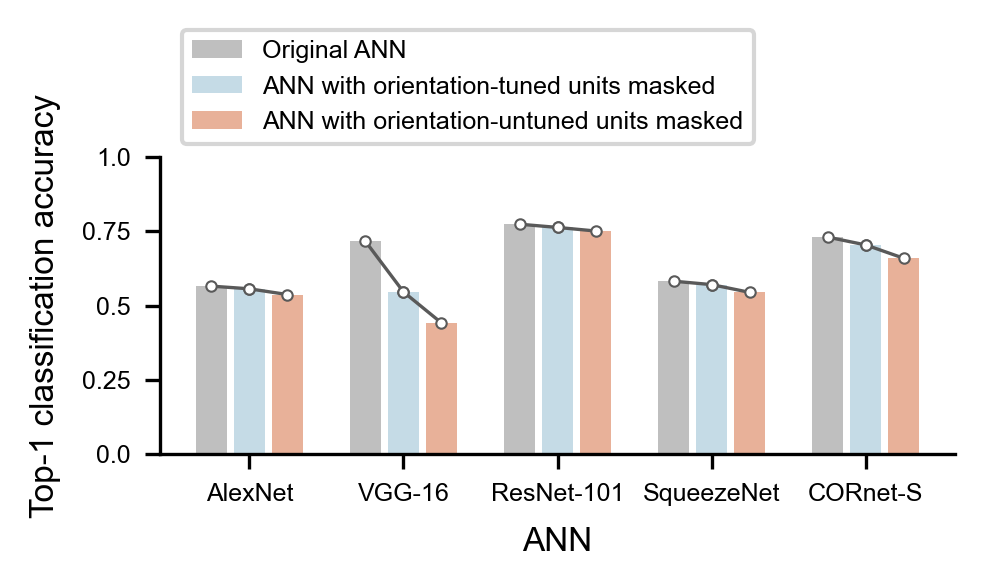

In [57]:
fig= plt.figure(figsize=(3.4,1.8),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

ax =plt.gca()

x = np.arange(len(ablation_results_acc_df))

width = 0.2
bar_center_displacement = width/3 +0.18
rects1 = ax.bar(x-bar_center_displacement, ablation_results_acc_df['origin ANN'], width, label='Original ANN', color='#BFBFBF', alpha=1)
rects2 = ax.bar(x, ablation_results_acc_df['ANN with orientation-tuned units masked'], width, label='ANN with orientation-tuned units masked', color='#C5DBE6', alpha=1)
rects3 = ax.bar(x+bar_center_displacement, ablation_results_acc_df['ANN with orientation-untuned units masked'], width, label='ANN with orientation-untuned units masked', color='#E8B199', alpha=1)

for i in range(len(ablation_results_acc_df)):
    ax.plot([i- bar_center_displacement, i], 
            [ablation_results_acc_df['origin ANN'][i], ablation_results_acc_df['ANN with orientation-tuned units masked'][i]],
            color='#595959', marker='o', markersize=2.5,markerfacecolor='white', markeredgewidth=0.5, linewidth=0.8)
    
for i in range(len(ablation_results_acc_df)):
    ax.plot([i, i + bar_center_displacement], 
            [ablation_results_acc_df['ANN with orientation-tuned units masked'][i], ablation_results_acc_df['ANN with orientation-untuned units masked'][i]],
            color='#595959', marker='o', markersize=2.5,markerfacecolor='white', markeredgewidth=0.5, linewidth=0.8)

ax.set_xlabel('ANN',fontsize=label_size, labelpad=5)
ax.set_ylabel('Top-1 classification accuracy', fontsize=label_size, labelpad=5)



ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)


# x_label_name = ann_results_df['name']

x_label_name = custom_order
ax.set_xticks(x)
ax.set_xticklabels(x_label_name, rotation=0) 

y_label = np.arange(0, 1.1, 0.25)
y_label = np.round(y_label, 2) 
ax.set_yticks(y_label) 
ax.set_yticklabels(y_label, rotation =0)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    loc="center left",
    ncol=1,
    bbox_to_anchor=(0.19, 0.88),
    bbox_transform=fig.transFigure,
    fontsize=legend_size
)

plt.subplots_adjust(left=.18, bottom=.2, right=0.96, top=0.75, wspace=None, hspace=None) 
# plt.savefig('./Results/results5/Fig7_C.svg', format='svg', dpi=300)
# plt.savefig('./Results/results4/Fig4_E.pdf', format='pdf', dpi=300)
    


### Fig 4-F

In [58]:
acc_type = 'acc5'
ablation_results_acc_df = pd.DataFrame(columns=['network name', 'origin ANN', 'ANN with orientation-tuned units masked', 'ANN with orientation-untuned units masked'])
for i, network_name in enumerate(network):
    file_path = os.path.join(rootpath, network_name, 'results_all_neurons')
    with open(os.path.join(file_path, 'acc_average.json'), 'r') as f:
        data = json.load(f)
    acc_origin = data[acc_type] / 100
    
    file_path = os.path.join(rootpath, network_name, 'results_mask_ori_neurons')
    with open(os.path.join(file_path, 'acc_average.json'), 'r') as f:
        data = json.load(f)
    acc_with_ori_mask = data[acc_type] / 100
    
    file_path = os.path.join(rootpath, network_name, 'results_mask_non_ori_neurons')
    with open(os.path.join(file_path, 'acc_average.json'), 'r') as f:
        data = json.load(f)
    acc_with_non_mask = data[acc_type] / 100
    
    new_data = {'network name': network_name, 'origin ANN': acc_origin, 'ANN with orientation-tuned units masked': acc_with_ori_mask, 'ANN with orientation-untuned units masked': acc_with_non_mask}
    ablation_results_acc_df = pd.concat([ablation_results_acc_df, pd.DataFrame([new_data])], ignore_index=True)
        

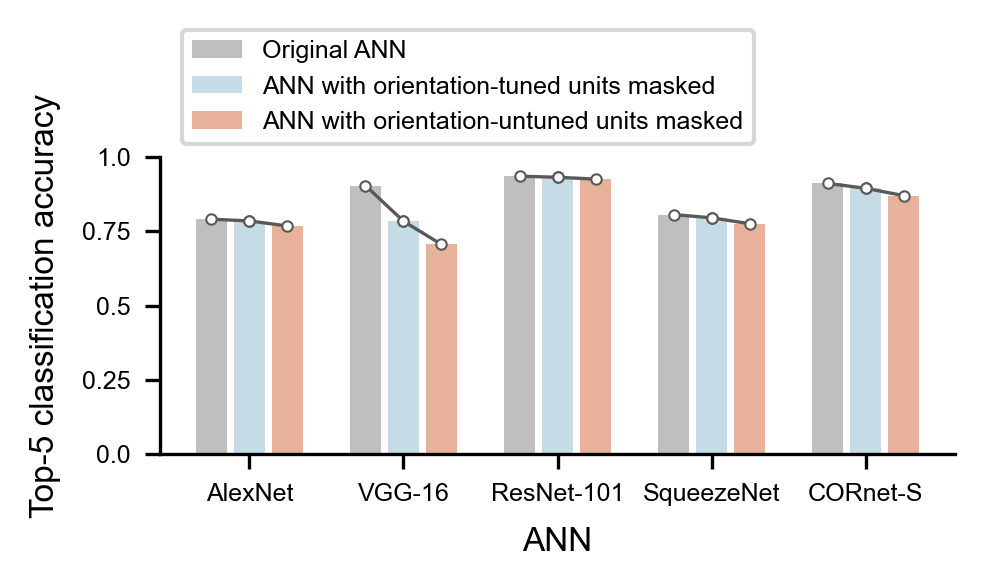

In [59]:
fig= plt.figure(figsize=(3.4,1.8),facecolor='w', frameon=True, dpi=300) 
plt.style.use('seaborn-muted')
plt.rcParams['font.sans-serif']=['Arial']
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['svg.hashsalt'] = 'hello'

ax =plt.gca()
x = np.arange(len(ablation_results_acc_df))

width = 0.2
bar_center_displacement = width/3 +0.18
rects1 = ax.bar(x-bar_center_displacement, ablation_results_acc_df['origin ANN'], width, label='Original ANN', color='#BFBFBF', alpha=1)
rects2 = ax.bar(x, ablation_results_acc_df['ANN with orientation-tuned units masked'], width, label='ANN with orientation-tuned units masked', color='#C5DBE6', alpha=1)
rects3 = ax.bar(x+bar_center_displacement, ablation_results_acc_df['ANN with orientation-untuned units masked'], width, label='ANN with orientation-untuned units masked', color='#E8B199', alpha=1)

for i in range(len(ablation_results_acc_df)):
    ax.plot([i- bar_center_displacement, i], 
            [ablation_results_acc_df['origin ANN'][i], ablation_results_acc_df['ANN with orientation-tuned units masked'][i]],
            color='#595959', marker='o', markersize=2.5,markerfacecolor='white', markeredgewidth=0.5, linewidth=0.8)
    
for i in range(len(ablation_results_acc_df)):
    ax.plot([i, i + bar_center_displacement], 
            [ablation_results_acc_df['ANN with orientation-tuned units masked'][i], ablation_results_acc_df['ANN with orientation-untuned units masked'][i]],
            color='#595959', marker='o', markersize=2.5,markerfacecolor='white', markeredgewidth=0.5, linewidth=0.8)

ax.set_xlabel('ANN',fontsize=label_size, labelpad=5)
ax.set_ylabel('Top-5 classification accuracy', fontsize=label_size, labelpad=5)



ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)


# x_label_name = ann_results_df['name']

x_label_name = custom_order
ax.set_xticks(x)
ax.set_xticklabels(x_label_name, rotation=0) 

y_label = np.arange(0, 1.1, 0.25)
y_label = np.round(y_label, 2) 
ax.set_yticks(y_label) 
ax.set_yticklabels(y_label, rotation =0)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    loc="center left",
    ncol=1,
    bbox_to_anchor=(0.19, 0.88),
    bbox_transform=fig.transFigure,
    fontsize=legend_size
)

plt.subplots_adjust(left=.18, bottom=.2, right=0.96, top=0.75, wspace=None, hspace=None) 
# plt.savefig('./Results/results5/Fig7_C.svg', format='svg', dpi=300)
plt.savefig('./Results/results4/Fig4_F.pdf', format='pdf', dpi=300)
    
